In [2]:
#Scanpy analyze 
import numpy as np
import pandas as pd
import scanpy as sc

#sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_header()
#sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read('/rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20240522_BeadArraySeq_48_2/Intermediate_data/Adata/adata_full.h5ad')  # replace 'yourfile.h5ad' with your filename



/ru-auth/local/home/aabdul/miniconda3/envs/scipy/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


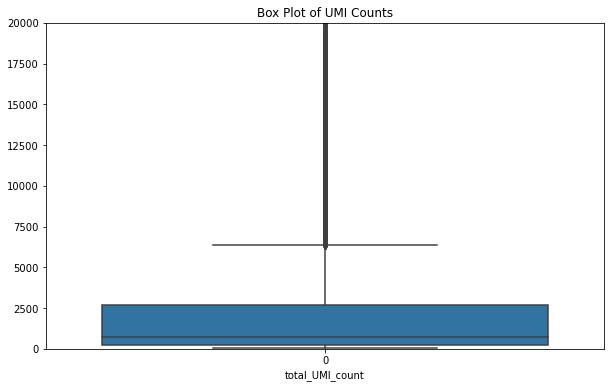

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Extract UMI counts
umi_counts = adata.obs['total_UMI_count']  # or the specific key where UMI counts are stored

plt.figure(figsize=(10, 6))
sns.boxplot(data=umi_counts)
plt.xlabel('total_UMI_count')
plt.title('Box Plot of UMI Counts')

# Set the maximum y value
plt.ylim(0, 20000)  # Replace 20000 with your desired maximum y value

# Save the figure as a PDF
plt.savefig('UMI_counts_plot.pdf', bbox_inches='tight')  # Ensure the plot fits within the PDF bounds

plt.show()


In [6]:
def extract_sample(cell_name):
    samples = ["20240522_Min10_cDNA", "20240522_Min5_cDNA", "20240522_Min20_cDNA"]
    for sample in samples:
        if sample in cell_name:
            return sample
    return None  # If no sample match is found (optional)

# Create the new column based on the index of adata.obs
adata.obs['sample_source'] = adata.obs.index.to_series().apply(extract_sample)


In [7]:
adata.obs['extracted_ID'] = adata.obs.index.to_series().str.split('.').str[-1].apply(lambda x: x.replace('-', ''))
extracted_id_data = adata.obs['extracted_ID']


In [8]:
adata.obs

,total_UMI_count,not_aligned_UMI_count,not_aligned_ratio,Exon_count,Exon_ratio,UMI_count,sample_source,extracted_ID
Cell_name,,,,,,,,
20240522_Min20_cDNA.ACACCGTA-AACAACCG-CTCACAGT-TCGTGCAA,124,4.0,0.032258,119,0.959677,120.0,20240522_Min20_cDNA,ACACCGTAAACAACCGCTCACAGTTCGTGCAA
20240522_Min20_cDNA.ACACCGTA-AACACGAC-ACACTCAG-AGTGCGAT,204,6.0,0.029412,193,0.946078,198.0,20240522_Min20_cDNA,ACACCGTAAACACGACACACTCAGAGTGCGAT
20240522_Min20_cDNA.ACACCGTA-AACACGAC-CAAGGTGA-TCACGGAT,10628,471.0,0.044317,9965,0.937618,10157.0,20240522_Min20_cDNA,ACACCGTAAACACGACCAAGGTGATCACGGAT
20240522_Min20_cDNA.ACACCGTA-AACACGAC-GGCTCAAT-ACGCTCTA,65,3.0,0.046154,59,0.907692,62.0,20240522_Min20_cDNA,ACACCGTAAACACGACGGCTCAATACGCTCTA
20240522_Min20_cDNA.ACACCGTA-AACCAGGT-AGCACATG-CCTAACGC,409,22.0,0.053790,380,0.929095,387.0,20240522_Min20_cDNA,ACACCGTAAACCAGGTAGCACATGCCTAACGC
...,...,...,...,...,...,...,...,...
20240522_Min20_cDNA.TTTCCGCTT-TTCTGAGG-TTGTTCCG-GACGTTAC,109,5.0,0.045872,102,0.935780,104.0,20240522_Min20_cDNA,TTTCCGCTTTTCTGAGGTTGTTCCGGACGTTAC
20240522_Min20_cDNA.TTTCCGCTT-TTGTTCCG-CAACCTAG-TCACGGAT,8109,391.0,0.048218,7556,0.931804,7718.0,20240522_Min20_cDNA,TTTCCGCTTTTGTTCCGCAACCTAGTCACGGAT
20240522_Min20_cDNA.TTTCCGCTT-TTGTTCCG-GAATCACG-GAGTACGT,26397,1180.0,0.044702,24513,0.928628,25217.0,20240522_Min20_cDNA,TTTCCGCTTTTGTTCCGGAATCACGGAGTACGT


In [9]:
adata.var['Mouse_gene'] = adata.var.index.str[:4] == 'ENSM'
adata = adata[:, adata.var['Mouse_gene'] == True]
#Create column in obs with summed genes 
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)
adata.var.head().transpose()
adata.var.index = adata.var['Gene_name'].astype(str)
adata.var_names_make_unique()

/tmp/ipykernel_155828/3620107224.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)
/ru-auth/local/home/aabdul/miniconda3/envs/scipy/lib/python3.9/contextlib.py:124: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


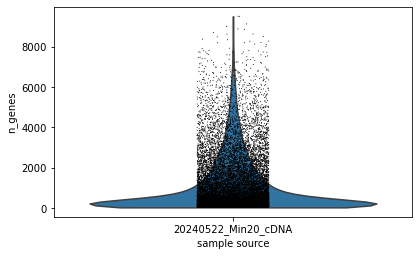

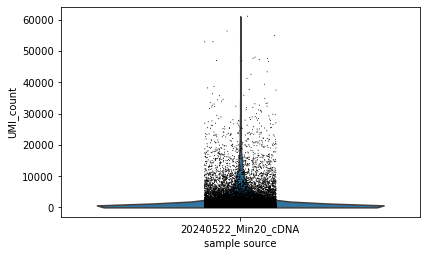

In [10]:
sc.pl.violin(adata, ['n_genes'],
             jitter=1, multi_panel=True, groupby="sample_source",
             xticks_rotation=90 )



sc.pl.violin(adata, ['UMI_count'],
             jitter=1, multi_panel=True, groupby="sample_source",
             xticks_rotation=90)


In [11]:
sc.pp.filter_cells(adata, min_counts= 2000)


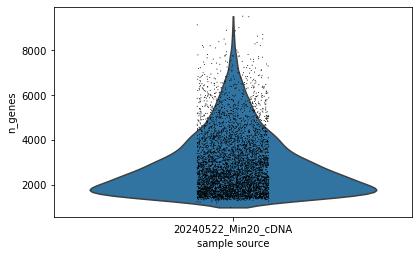

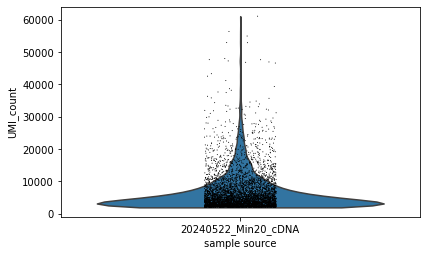

In [138]:
sc.pl.violin(adata, ['n_genes'],
             jitter=1, multi_panel=True, groupby="sample_source",
             xticks_rotation=90 )



sc.pl.violin(adata, ['UMI_count'],
             jitter=1, multi_panel=True, groupby="sample_source",
             xticks_rotation=90)


In [143]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


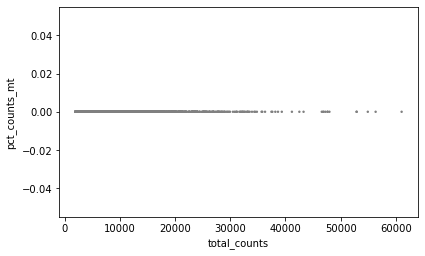

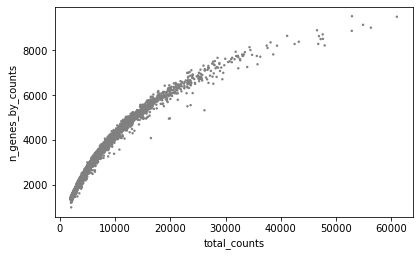

In [144]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [145]:
adata = adata[adata.obs.pct_counts_mt < 5, :]


In [146]:
sc.pp.normalize_total(adata, target_sum=1e4)


/ru-auth/local/home/aabdul/miniconda3/envs/scipy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


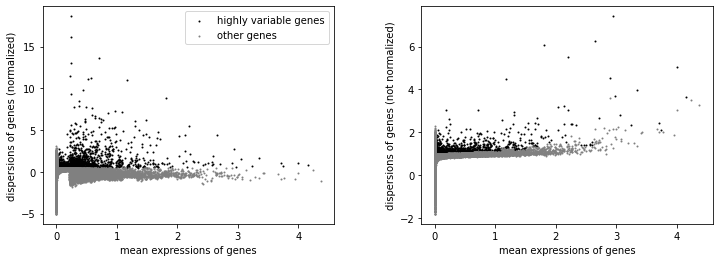

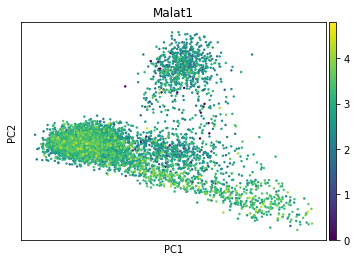

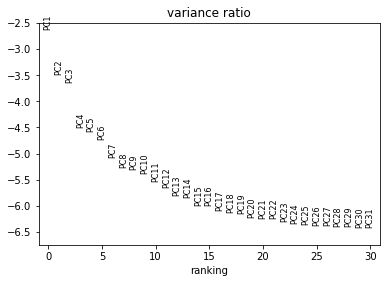

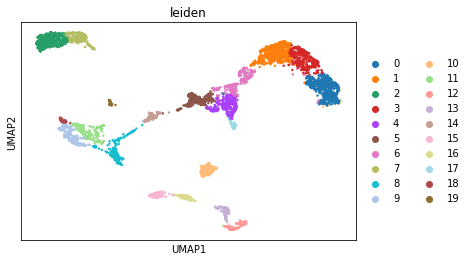

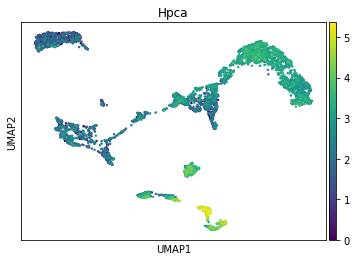

In [147]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=5, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.tl.pca(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.scale(adata, max_value=10)
sc.pl.pca(adata, color='Malat1')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)
sc.tl.umap(adata, min_dist=0, spread=3)
sc.tl.leiden(adata, resolution = 1.3)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['Hpca'])


In [153]:
sc.tl.umap(adata, min_dist=0, spread=3)


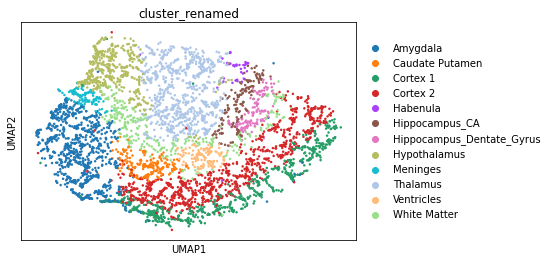

In [154]:
sc.pl.umap(subset_adata, color=['cluster_renamed'])


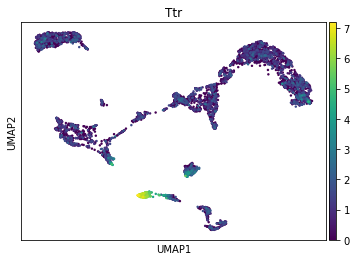

In [150]:
sc.pl.umap(adata, color=['Ttr'])


In [151]:
sc.tl.leiden(adata, resolution = 1)


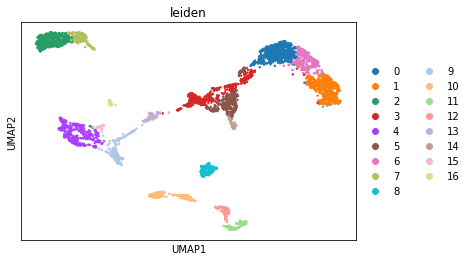

In [152]:
sc.pl.umap(adata, color=['leiden'])


In [78]:
#canberra

#Load UMAP coordinates
import pandas as pd

# Define the path to the CSV file
file_path =  "/rugpfs/fs0/cao_lab/scratch/aabdul/projects/AA_20240522_BeadArraySeq_48/Intermediate_data2/Spatial_barcode_extraction/20min.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
print(df.head())


                         Unnamed: 0      UMAP1     UMAP2
0  ACACCGTAAACAACCGCTCACAGTTCGTGCAA   4.749886  0.669519
1  ACACCGTAAACACGACACACTCAGAGTGCGAT -11.071051 -2.363361
2  ACACCGTAAACACGACCAAGGTGATCACGGAT  -5.411638  7.153830
3  ACACCGTAAACACGACGGCTCAATACGCTCTA   4.616203  8.437395
4  ACACCGTAAACCAGGTAGCACATGCCTAACGC   8.752335  6.525337


In [ ]:
# Backup the 'cell_name' index to a temporary column
adata.obs['cell_name_temp'] = adata.obs.index

# Perform the merge
merged = adata.obs.merge(df, left_on="extracted_ID", right_on="Unnamed: 0", how="left", suffixes=('_adata', '_df'))

# Restore the 'cell_name' index from the temporary column
merged.index = merged['cell_name_temp']
adata.obs = adata.drop(columns=['cell_name_temp', 'Unnamed: 0'])  # Removing unwanted columns
adata.obs = merged.drop(columns=['cell_name_temp', 'Unnamed: 0'])
#Here i am adding spatial coordinate for plottning 
adata.obsm['X_umap'] = adata.obs[['UMAP1',"UMAP2"]].values



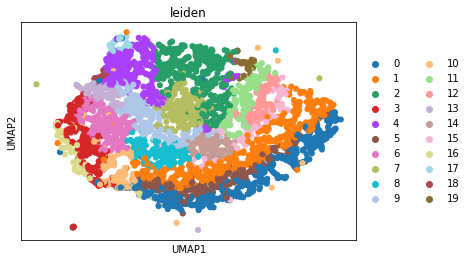

In [84]:

sc.pl.umap(adata, color=['leiden'], vmax=10000, s =150)



In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [88]:
# Assuming subset_adata_cluster.obs is your DataFrame with UMAP1 and UMAP2 columns
df = adata.obs[['UMAP1', 'UMAP2']]
# Drop rows with NaN values
df_clean = df.dropna()

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=1, min_samples=10)  # Adjust eps and min_samples as needed

# Fit the model to your data
dbscan.fit(df_clean)

# Add the cluster labels to your DataFrame
df_clean['Cluster'] = dbscan.labels_



/tmp/ipykernel_211371/2283788145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = dbscan.labels_


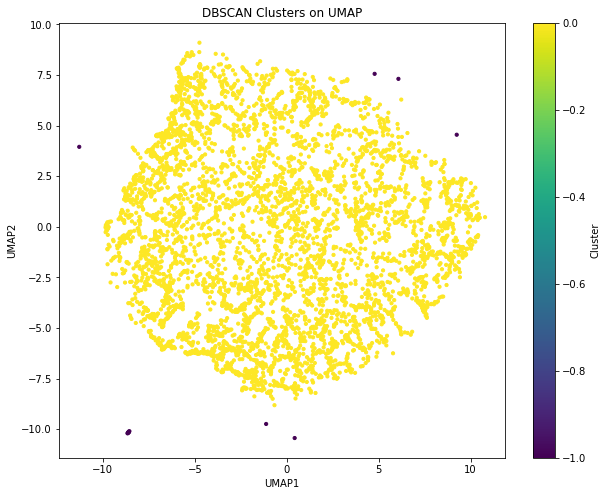

In [89]:
plt.figure(figsize=(10, 8))
plt.scatter(df_clean['UMAP1'], df_clean['UMAP2'], c=df_clean['Cluster'], cmap='viridis', s=10)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('DBSCAN Clusters on UMAP')
plt.colorbar(label='Cluster')
plt.show()


In [90]:
df_subset = df_clean[df_clean['Cluster'].isin([0])]


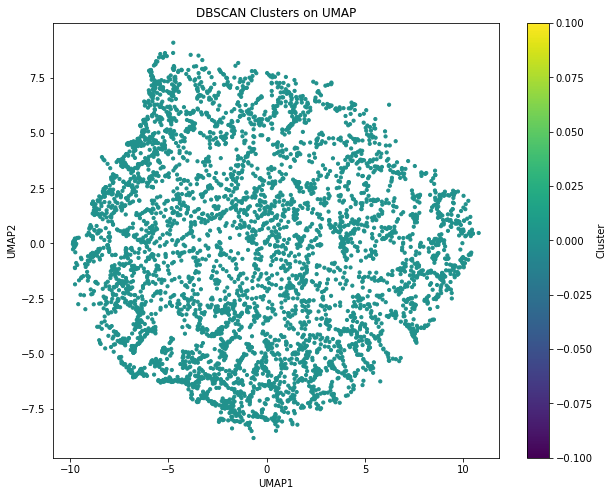

In [91]:
plt.figure(figsize=(10, 8))
plt.scatter(df_subset['UMAP1'], df_subset['UMAP2'], c=df_subset['Cluster'], cmap='viridis', s=10)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('DBSCAN Clusters on UMAP')
plt.colorbar(label='Cluster')
plt.show()


In [100]:
# Get the indices (cell identifiers) of the subsetted DataFrame
cell_ids = df_subset.index
# Assuming your AnnData object is named `subset_adata_cluster`
subset_adata = adata[cell_ids, :]



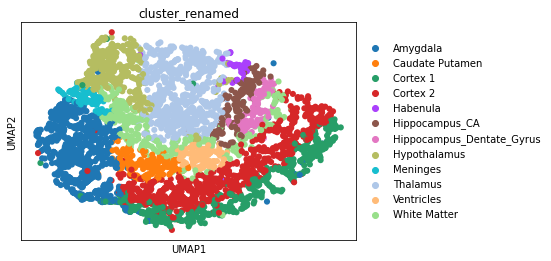

In [103]:
sc.pl.umap(subset_adata, color=['cluster_renamed'], vmax=10000, s =150)


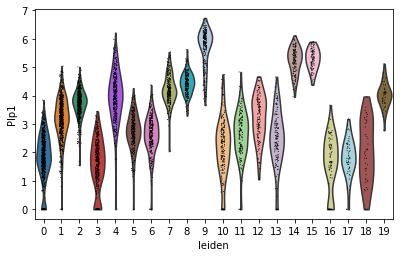

In [96]:
sc.pl.violin(adata, ['Plp1'],
             jitter=1, multi_panel=True, 
             xticks_rotation=90, groupby = 'leiden')


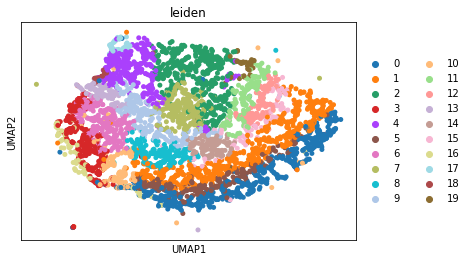

In [151]:
sc.pl.umap(adata, color=['leiden'], s=100)
#0,1,5-cortex
#15,9-White Matter
#14-Ventricles
#3,6,7,10-Amygdala
#8-Caudate Putamen 
#4,17,18-Hypothalamus
#13-Meninges 
#7,2-Thalamus
#2,7-Thalamus 
#11-Hippocampus_CA
#12-Hippocampus_Dentate_Gyrus



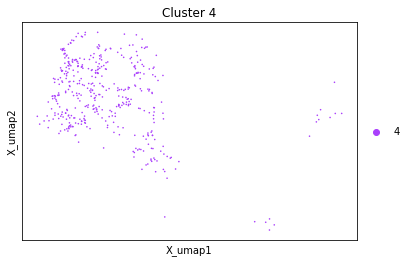

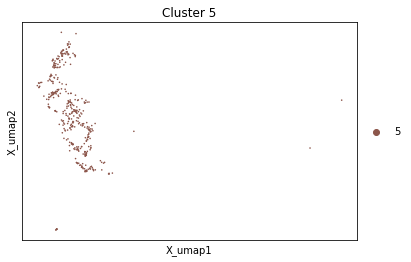

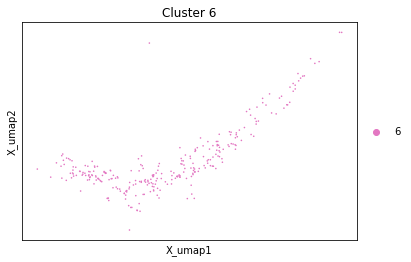

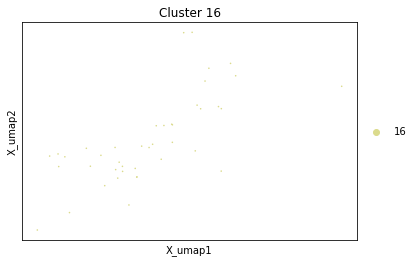

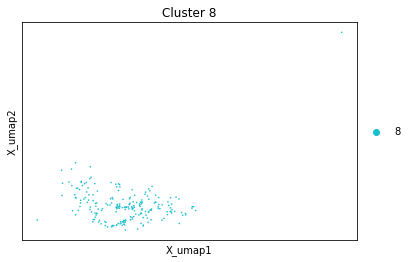

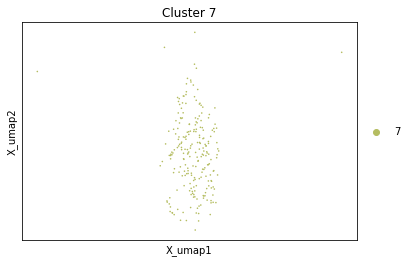

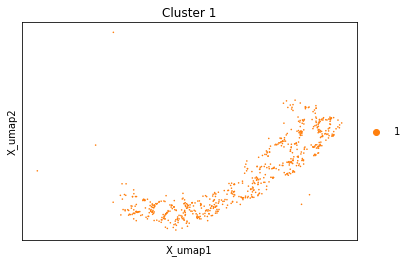

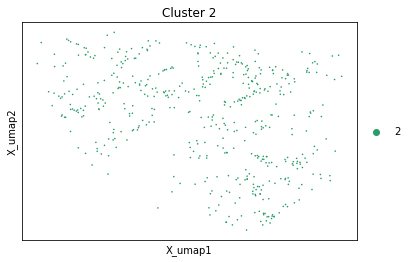

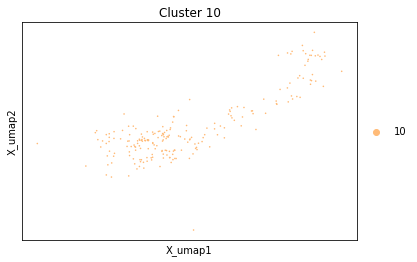

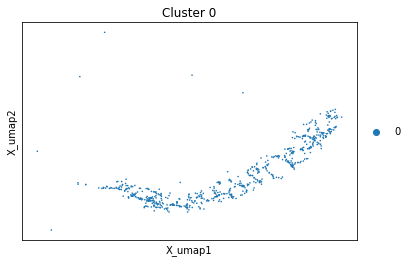

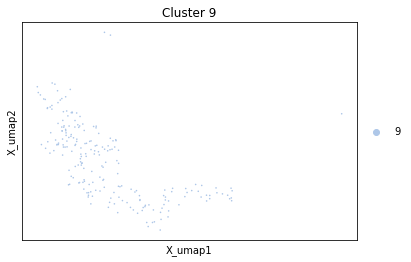

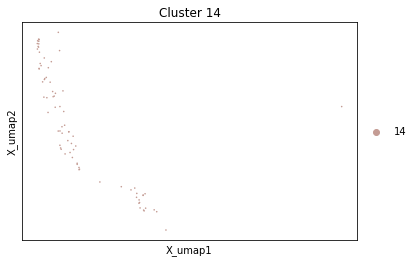

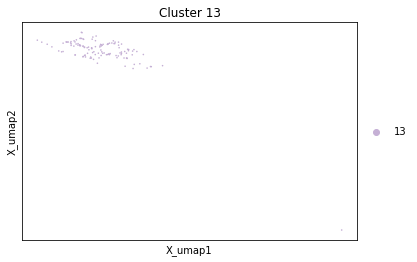

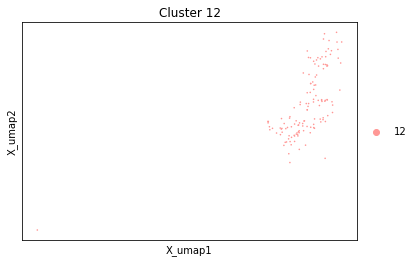

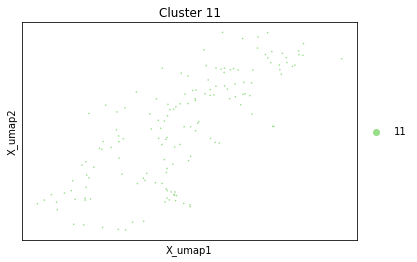

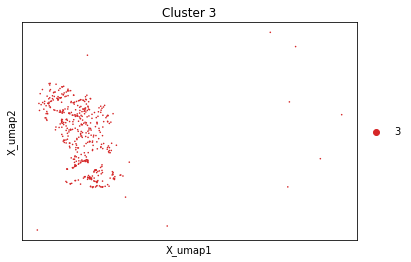

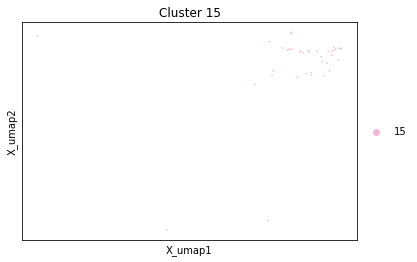

In [144]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming 'adata' is your AnnData object and 'leiden' is your clustering column

# Get unique clusters
clusters = adata.obs['leiden'].unique()

# Loop through each cluster and plot
for cluster in clusters:
    # Create a boolean mask for the current cluster
    mask = adata.obs['leiden'] == cluster
    
    # Plot the embedding for the current cluster
    sc.pl.embedding(
        adata[mask],  # Subset the data for the current cluster
        basis='X_umap', 
        color='leiden', 
        vmin=2, 
        s=10,
        title=f'Cluster {cluster}'
    )
    plt.show()  # Display the plot


In [99]:
import pandas as pd

# Assuming adata is your AnnData object and adata.obs['cluster'] contains the cluster labels

#0-coRTEX1
#1,5-cortex
#15,9-White Matter
#14-Ventricles
#16,3,6-Amygdala
#8-Caudate Putamen 
#4,17,18-Hypothalamus
#13-Meninges 
#7,2-Thalamus
#2,7-Thalamus 
#11-Hippocampus_CA
#12-Hippocampus_Dentate_Gyrus

cluster_mapping = {
    '0': 'Cortex 1',
    '1': 'Cortex 2',
    '2': 'Thalamus',
    '3': 'Amygdala',
    '4': 'Hypothalamus',
    '5': 'Cortex 2',
    '6': 'Amygdala',
    '7': 'Thalamus',
    '8': 'Caudate Putamen',
    '9': 'White Matter',
    '10': 'Amygdala',
    '11': 'Hippocampus_CA',
    '12': 'Hippocampus_Dentate_Gyrus',
    '13': 'Meninges',
    '14': 'Ventricles',
    '15': 'White Matter',
    '16': 'Amygdala',
    '17': 'Hypothalamus',
    '18': 'Hypothalamus',
     '19': 'Habenula'
    # Add more mappings as needed
}

# Step 2: Apply the mapping to rename the clusters
adata.obs['cluster_renamed'] = adata.obs['leiden'].map(cluster_mapping)



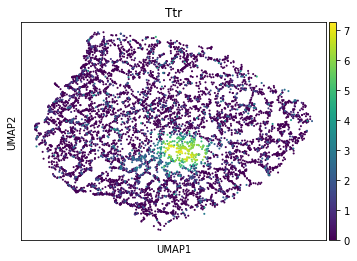

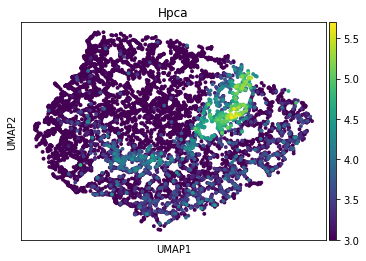

In [48]:
sc.pl.umap(subset_adata, color=['Ttr'])
sc.pl.umap(subset_adata, color=['Hpca'], vmin=3, s=60)



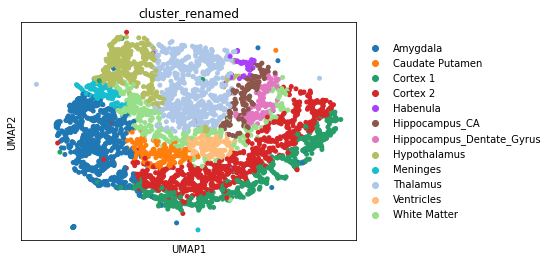

In [155]:
sc.pl.umap(adata, color=['cluster_renamed'], size =100)


<Figure size 720x576 with 0 Axes>

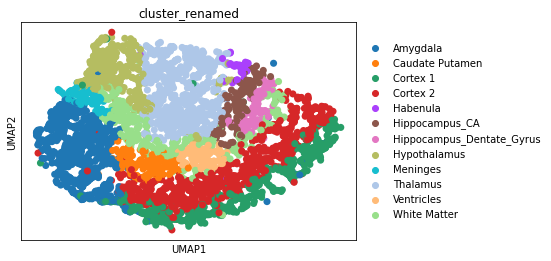

<Figure size 432x288 with 0 Axes>

In [182]:
import scanpy as sc

# Set the dimensions for the plot (width, height)
sc.pl.umap(subset_adata, color=['cluster_renamed'], vmin=3, s=200, figsize=(10, 8), save='clustering.pdf')


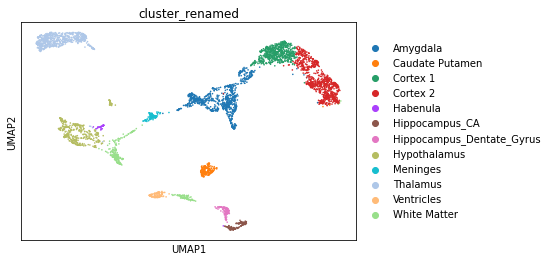

In [194]:
sc.pl.umap(subset_adata, color=['cluster_renamed'], vmin=3, s=10, save='UMAP_Gene.pdf')




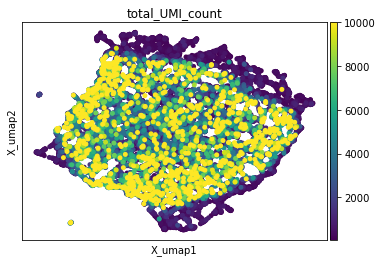

In [102]:

sc.pl.embedding(adata, basis='X_umap', color=['total_UMI_count'], s =100,vmax=10000, save='umap_plotHpca.pdf')

